# DQN Implementation for LunarLander-v2

This notebook demonstrates how to implement a Deep Q-Network (DQN) to solve the **LunarLander-v2** environment in Gymnasium.  
We organize the code so that:
- **`dqn_model.py`** contains the Q-Network definition.
- **`dqn_agent.py`** contains the replay buffer and DQN agent logic.
- This notebook loads those modules and runs training, then plots reward over time.


In [1]:
%pip install --quiet gymnasium torch matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import deque

# Ensure our modules are in the Python path
import sys
sys.path.append('/mnt/data')

from dqn_agent import DQNAgent


In [3]:
# Hyperparameters
ENV_NAME     = "LunarLander-v3"
BUFFER_SIZE  = int(1e5)
BATCH_SIZE   = 64
GAMMA        = 0.99
LR           = 1e-3
TAU          = 1e-3
UPDATE_EVERY = 4
EPS_START    = 1.0
EPS_END      = 0.01
EPS_DECAY    = 0.995
HIDDEN_DIM   = 128
MAX_EPISODES = 500
PRINT_EVERY  = 20


In [4]:
def train_dqn(env_name, agent, max_episodes=MAX_EPISODES, print_every=PRINT_EVERY):
    env = gym.make(env_name)
    scores = []
    scores_window = deque(maxlen=print_every)
    eps = EPS_START

    for i_episode in range(1, max_episodes + 1):
        state, _ = env.reset()
        score = 0
        done = False
        while not done:
            action = agent.act(state, eps)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward

        scores_window.append(score)
        scores.append(score)
        eps = max(EPS_END, EPS_DECAY * eps)

        if i_episode % print_every == 0:
            print(f"Episode {i_episode}	Average Score: {np.mean(scores_window):.2f}")

    env.close()
    return scores

# Instantiate agent and train
env_tmp = gym.make(ENV_NAME)
state_dim = env_tmp.observation_space.shape[0]
action_dim = env_tmp.action_space.n
env_tmp.close()

agent = DQNAgent(
    state_dim=state_dim,
    action_dim=action_dim,
    seed=0,
    buffer_size=BUFFER_SIZE,
    batch_size=BATCH_SIZE,
    gamma=GAMMA,
    lr=LR,
    tau=TAU,
    update_every=UPDATE_EVERY,
    device='cpu'
)

scores = train_dqn(ENV_NAME, agent)


Episode 20	Average Score: -164.46
Episode 40	Average Score: -169.43
Episode 60	Average Score: -173.06
Episode 80	Average Score: -141.42
Episode 100	Average Score: -134.33
Episode 120	Average Score: -82.95
Episode 140	Average Score: -132.26
Episode 160	Average Score: -85.91
Episode 180	Average Score: -81.22
Episode 200	Average Score: -56.60
Episode 220	Average Score: -92.62
Episode 240	Average Score: -64.03
Episode 260	Average Score: -14.27
Episode 280	Average Score: -53.61
Episode 300	Average Score: -58.91
Episode 320	Average Score: -4.00
Episode 340	Average Score: -7.32
Episode 360	Average Score: 4.63
Episode 380	Average Score: 64.71
Episode 400	Average Score: 79.10
Episode 420	Average Score: 101.23
Episode 440	Average Score: 146.14
Episode 460	Average Score: 156.73
Episode 480	Average Score: 195.02
Episode 500	Average Score: 170.13


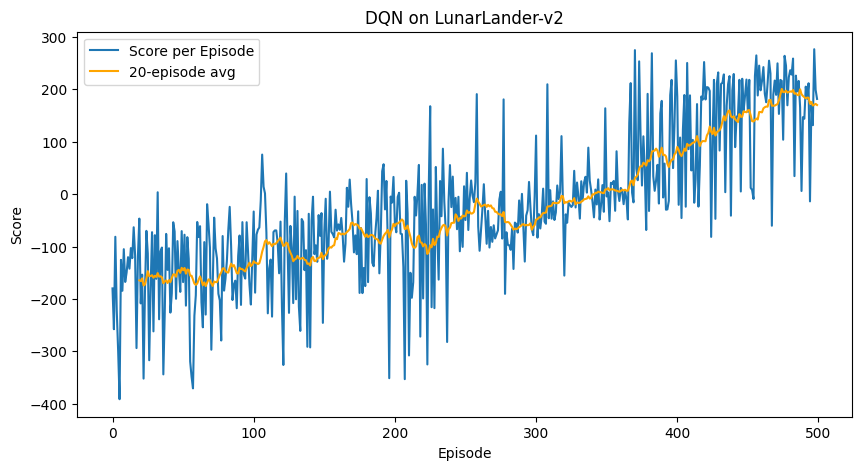

In [5]:
# Plot the scores over episodes
plt.figure(figsize=(10,5))
plt.plot(scores, label="Score per Episode")
# Running average (window size = PRINT_EVERY)
running_avg = np.convolve(scores, np.ones(PRINT_EVERY)/PRINT_EVERY, mode='valid')
plt.plot(np.arange(len(running_avg)) + PRINT_EVERY - 1, running_avg, color='orange', label=f"{PRINT_EVERY}-episode avg")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title("DQN on LunarLander-v2")
plt.legend()
plt.show()
